<a href="https://colab.research.google.com/github/jbshirk/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/Joseph_Shirk_LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

## Save to:
  module4-sequence-your-narrative/

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

## Plan

Variables to visual encodings
- x : Income (which should rightly be called Purchasing Power)
- y: Lifespan (which should rightly be called Longevity)
- color : Region category
- dot size : Population
- time slice for animated GIF, etc : Year
- annotations : Country

Qualitative
- Editorial - I wiould like to add popup annotations / alt-text for 'Regime' : Stalin, Mao, Roosevelt, Churchill, etc

Columns

Year | Country | Region | PurchPower | Longevity | Population

In [1]:
# check seaborn version
import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
# names of countries and regions
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [10]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

There are less than about 44,000 intersections for merge


In [13]:
# pppp = purchasing power per person
income.rename(columns={'income_per_person_gdppercapita_ppp_inflation_adjusted' : 'pppp'}, inplace=True)
income.head()

,geo,time,pppp
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [0]:
income.sample(9)

In [18]:
lifespan.rename(columns={'life_expectancy_years' : 'longevity'}, inplace=True)
lifespan.head()

,geo,time,longevity
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [19]:
population.rename(columns={'population_total' : 'pop'}, inplace=True)
population.head()

,geo,time,pop
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
entities.shape
pd.options.display.max_columns = 33
entities.rename(columns={'country':'geo', 'world_4region':'region4','world_6region':'region6'}, inplace=True)


In [0]:
entities.drop(columns=[
        'alt_5', 	'alternative_1', 	'alternative_2', 	'alternative_3', 	'alternative_4_cdiac',
         	'arb1', 	'arb2', 	'arb3', 	'arb4', 	'arb5', 	'arb6' 	], inplace=True)

In [28]:
entities.head()

,geo,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,region4,region6
0,abkh,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
df = pd.merge(income,lifespan)

In [0]:
df =pd.merge(df,population)

In [0]:
df = pd.merge(df,entities)

In [0]:
df.rename(columns={'time':'year','g77_and_oecd_countries':'g77oecd'},inplace=True)

In [37]:
df.head()

,geo,year,pppp,longevity,pop,g77oecd,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,region4,region6
0,afg,1800,603,28.21,3280000,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
1,afg,1801,603,28.20,3280000,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
2,afg,1802,603,28.19,3280000,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,afg,1803,603,28.18,3280000,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
4,afg,1804,603,28.17,3280000,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia


In [38]:
df.dtypes

geo                       object
year                       int64
pppp                       int64
longevity                float64
pop                        int64
g77oecd                   object
gapminder_list            object
god_id                    object
gwid                      object
income_groups             object
is--country                 bool
iso3166_1_alpha2          object
iso3166_1_alpha3          object
iso3166_1_numeric        float64
iso3166_2                 object
landlocked                object
latitude                 float64
longitude                float64
main_religion_2008        object
name                      object
pandg                     object
un_state                    bool
unicode_region_subtag     object
upper_case_name           object
region4                   object
region6                   object
dtype: object

In [40]:
mask_usa = df['name'] == 'United States'
usa = df[mask_usa]
usa.head()

,geo,year,pppp,longevity,pop,g77oecd,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,region4,region6
38028,usa,1800,2127,39.41,6801854,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america
38029,usa,1801,2167,39.41,6933517,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america
38030,usa,1802,2202,39.41,7067728,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america
38031,usa,1803,2166,39.41,7204538,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america
38032,usa,1804,2165,39.41,7343995,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america


#Visualization

In [0]:
import seaborn as sns

In [45]:
now = df[df['year'] == 2018]
now.head()

,geo,year,pppp,longevity,pop,g77oecd,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,region4,region6
218,afg,2018,1867,58.69,36373176,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
437,ago,2018,5846,65.19,30774205,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50,18.5,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
656,alb,2018,12424,78.01,2934363,others,Albania,AL,i3,upper_middle_income,True,AL,ALB,8.0,NaN,coastline,41.00,20.0,muslim,Albania,ALBANIA,True,AL,ALBANIA,europe,europe_central_asia
922,are,2018,68231,76.89,9541615,g77,United Arab Emirates,AE,i238,high_income,True,AE,ARE,784.0,NaN,coastline,23.75,54.5,muslim,United Arab Emirates,UNITED ARAB EMIRATES,True,AE,UNITED ARAB EMIRATES,asia,middle_east_north_africa
1141,arg,2018,18942,76.97,44688864,g77,Argentina,AR,i10,upper_middle_income,True,AR,ARG,32.0,NaN,coastline,-34.00,-64.0,christian,Argentina,ARGENTINA,True,AR,ARGENTINA,americas,america


Text(40.81656250000002, 0.5, 'Longevity')

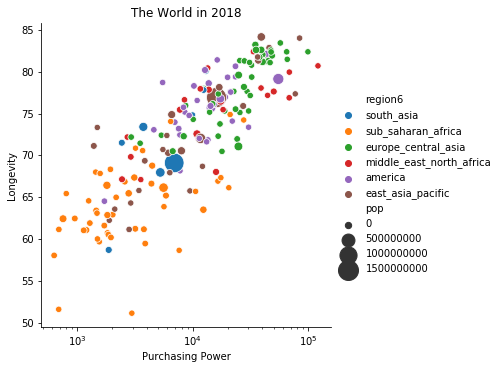

In [55]:
sns.relplot(x='pppp', 
            y='longevity', 
            hue='region6',
            size='pop',
            sizes=(40, 400),
            data=now);
plt.xscale('log')
#plt.ylim([30, 90])
plt.title('The World in 2018')
plt.xlabel("Purchasing Power")
plt.ylabel("Longevity")
#plt.legend(labels = "Regions & Population Density");

## Create a sequence of visualizations 
that combined tell a story of your choosing.

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO